In [ ]:
# 1. Load Dataset
# Import the dataset from CSV file into a DataFrame for further processing.

In [1]:
# Import Libraries
import pandas as pd
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

# Load Dataset
data_penjualan_apotek = '/Users/Erlemico/Downloads/data-penjualan-apotek.csv'
df = pd.read_csv(data_penjualan_apotek, low_memory=False)

# Show the first few rows
display(HTML(df.head().to_html()))

# Show total number of rows and columns
print(f"Total rows: {df.shape[0]}, Total columns: {df.shape[1]}")

,Unnamed: 0,no_resep,tgl,kd_cust,jam_jual,kd_obat,qty,hna,hj,ppn_jual,nama_obat,waktu_transaksi,kelas_terapi
0,0,B-04.2015-01-0001,4/2/2015,UMUM,10:36:07,R-0625,6.0,760.0,1045.000,0,Diadium,4/2/2015 10:36,NaN
1,1,B-04.2015-01-0001,4/2/2015,UMUM,10:36:07,R-0528,8.0,203.0,279.125,0,Cotrimoxazole 480mg,4/2/2015 10:36,ANTIINFEKSI
2,2,B-04.2015-01-0001,4/2/2015,UMUM,10:36:07,AI-0354,6.0,123.0,162.000,0,Dexanta 350 mg tab,4/2/2015 10:36,NaN
3,3,B-04.2015-09-0001,4/21/2015,UMUM,17:48:41,R-4027,10.0,2112.0,2904.000,0,Micro Fen (BD),4/21/2015 17:48,NaN
4,4,B-04.2015-09-0002,4/22/2015,UMUM,17:16:48,R-1297,10.0,8360.0,11495.000,0,Lapicef 500mg,4/22/2015 17:16,NaN


Total rows: 411646, Total columns: 13


In [ ]:
# 2. Data Overview
# Preview the dataset structure, data types, and descriptive statistics to understand the content.

In [2]:
# Data Overview
print("\nData Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411646 entries, 0 to 411645
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       411646 non-null  int64  
 1   no_resep         411646 non-null  object 
 2   tgl              411646 non-null  object 
 3   kd_cust          411646 non-null  object 
 4   jam_jual         411646 non-null  object 
 5   kd_obat          411646 non-null  object 
 6   qty              411646 non-null  float64
 7   hna              411646 non-null  float64
 8   hj               411646 non-null  float64
 9   ppn_jual         411646 non-null  int64  
 10  nama_obat        411646 non-null  object 
 11  waktu_transaksi  411646 non-null  object 
 12  kelas_terapi     289379 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 40.8+ MB
None

Statistical Summary:
          Unnamed: 0            qty           hna            hj       ppn_jual
cou

In [ ]:
# 3. Data Pre-processing
# Cleaning the dataset by handling missing values, correcting outliers, and ensuring consistency before analysis.

In [ ]:
## 3.1 Handling Missing Values
# > Fill missing values in numeric columns with median.
# > Fill missing values in categorical columns with mode.
# > Special handling: Fill missing values in 'kelas_terapi' column with 'Unknown'.

In [3]:
# Data Pre-processing
# Handling Missing Values
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

# Fill missing numeric columns with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill missing categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col == 'kelas_terapi':
        df[col] = df[col].fillna('Unknown')
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


Missing Values Before Cleaning:
Unnamed: 0              0
no_resep                0
tgl                     0
kd_cust                 0
jam_jual                0
kd_obat                 0
qty                     0
hna                     0
hj                      0
ppn_jual                0
nama_obat               0
waktu_transaksi         0
kelas_terapi       122267
dtype: int64


In [ ]:
## 3.2 Handling Outliers
# Apply Interquartile Range (IQR) method to detect and handle outliers in `qty`, `hna`, and `hj` columns.

In [4]:
# Handle Outliers (IQR Method)
for col in ['qty', 'hna', 'hj']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
Unnamed: 0         0
no_resep           0
tgl                0
kd_cust            0
jam_jual           0
kd_obat            0
qty                0
hna                0
hj                 0
ppn_jual           0
nama_obat          0
waktu_transaksi    0
kelas_terapi       0
dtype: int64


In [ ]:
# 4. Data Transformation
# Standardizing numeric features, encoding categorical variables, and discretizing (`binning`) `qty` and `hj` values.

In [ ]:
## 4.1 Standardization
# Rescaling `qty`, `hna`, and `hj` features to have mean 0 and standard deviation 1 using StandardScaler.

In [5]:
# Data Transformation
# Standardization
scaler = StandardScaler()
for col in ['qty', 'hna', 'hj']:
    df[col] = scaler.fit_transform(df[[col]])

In [ ]:
## 4.2 Encoding Categorical Variables
# Converting categorical variables into numeric format using Label Encoding for further analysis.

In [6]:
# Encoding Categorical Variables
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
## 4.3 Binning
# Grouping `qty` and `hj` values into discrete categories to simplify the analysis.

In [7]:
# Binning qty
qty_bins = [-np.inf, -0.5, 0.5, np.inf]
qty_labels = ['Low', 'Medium', 'High']
df['qty_group'] = pd.cut(df['qty'], bins=qty_bins, labels=qty_labels)

In [8]:
# Binning hj
hj_bins = [-np.inf, -0.5, 0.5, 1.5, np.inf]
hj_labels = ['Very Low', 'Low', 'Medium', 'High']
df['hj_group'] = pd.cut(df['hj'], bins=hj_bins, labels=hj_labels)

In [ ]:
# 5. Data Reduction
# Selecting important columns (`qty`, `hna`, `hj`, `kd_cust`, `kd_obat`, `kelas_terapi`) for focused analysis and exploration.

In [9]:
# Data Reduction
selected_columns = ['qty', 'hna', 'hj', 'kd_cust', 'kd_obat', 'kelas_terapi']
reduced_df = df[selected_columns]

In [ ]:
# 6. Feature Selection (Filter Method)
# Applying Filter Method (Variance Threshold) to remove features with very low variance, improving data quality for analysis.

In [10]:
# Feature Selection - Filter Method
selector = VarianceThreshold(threshold=0.01)
selected_features = selector.fit_transform(reduced_df)
selected_feature_names = reduced_df.columns[selector.get_support(indices=True)]
print("\nSelected Features after Variance Threshold:")
print(selected_feature_names)


Selected Features after Variance Threshold:
Index(['qty', 'hna', 'hj', 'kd_cust', 'kd_obat', 'kelas_terapi'], dtype='object')


In [ ]:
# 7. Exploratory Data Analysis (EDA)
# Exploring the dataset using visualizations to understand the data distribution, correlation among features, and identifying patterns.

In [ ]:
## 7.1 Distribution Plots
# Display the distribution of `qty`, `hna`, and `hj` features using histograms.

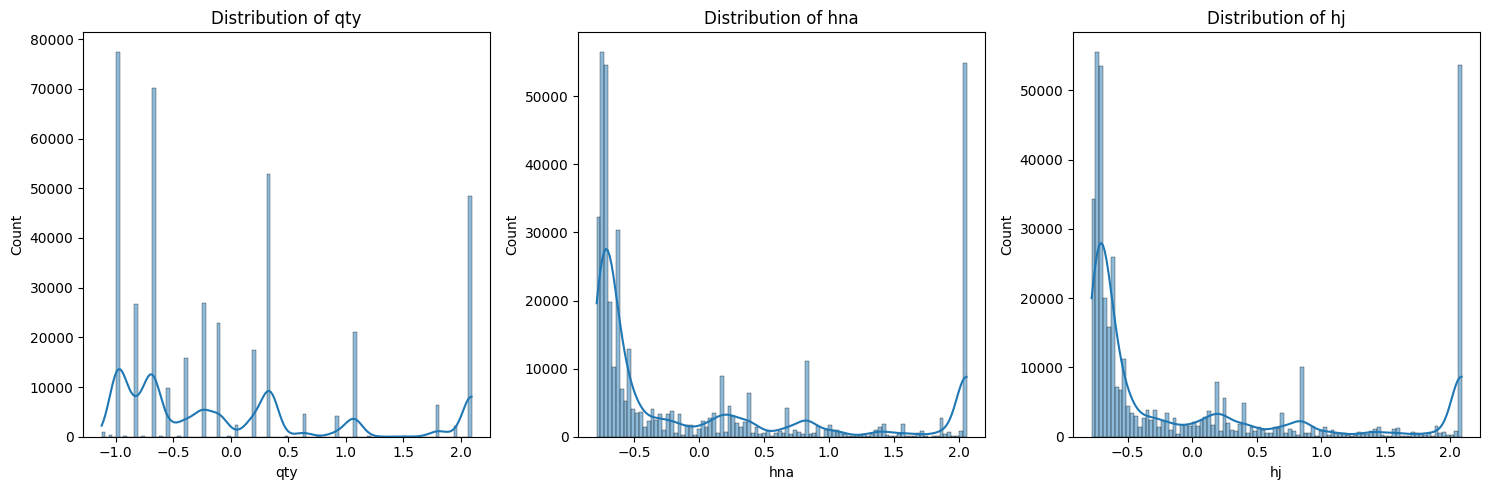

In [11]:
# Distribution Plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['qty'], kde=True)
plt.title('Distribution of qty')

plt.subplot(1, 3, 2)
sns.histplot(df['hna'], kde=True)
plt.title('Distribution of hna')

plt.subplot(1, 3, 3)
sns.histplot(df['hj'], kde=True)
plt.title('Distribution of hj')

plt.tight_layout()
plt.show()

In [ ]:
## 7.2 Boxplots for Outlier Detection
# Visualize outliers in `qty`, `hna`, and `hj` features using boxplots.

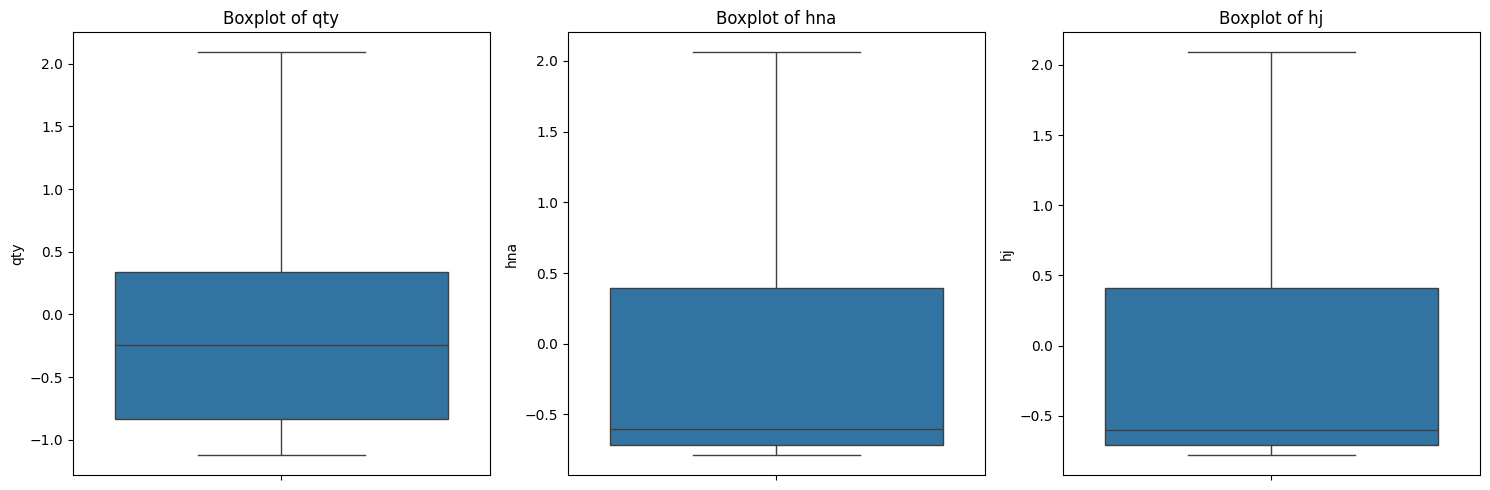

In [12]:
# Boxplots for Outlier Detection
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(y=df['qty'])
plt.title('Boxplot of qty')

plt.subplot(1,3,2)
sns.boxplot(y=df['hna'])
plt.title('Boxplot of hna')

plt.subplot(1,3,3)
sns.boxplot(y=df['hj'])
plt.title('Boxplot of hj')

plt.tight_layout()
plt.show()

In [ ]:
## 7.3 Correlation Heatmap
# Visualize correlation among numerical features using a heatmap.

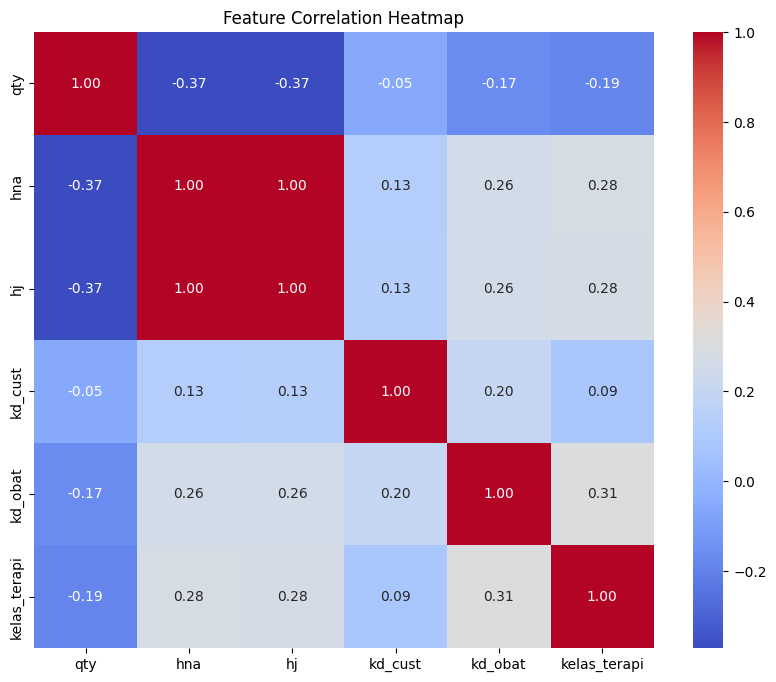

From the heatmap, it can be seen that the features ‘hna’ and ‘hj’ have a strong positive correlation.


In [13]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(reduced_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# Analysis result
print("From the heatmap, it can be seen that the features ‘hna’ and ‘hj’ have a strong positive correlation.")

In [ ]:
## 7.4 Pairplot of Important Features
# Generate pairplots to visualize relationships between `qty`, `hna`, and `hj` grouped by `kelas_terapi`, using a sample of 5000 rows for efficiency.

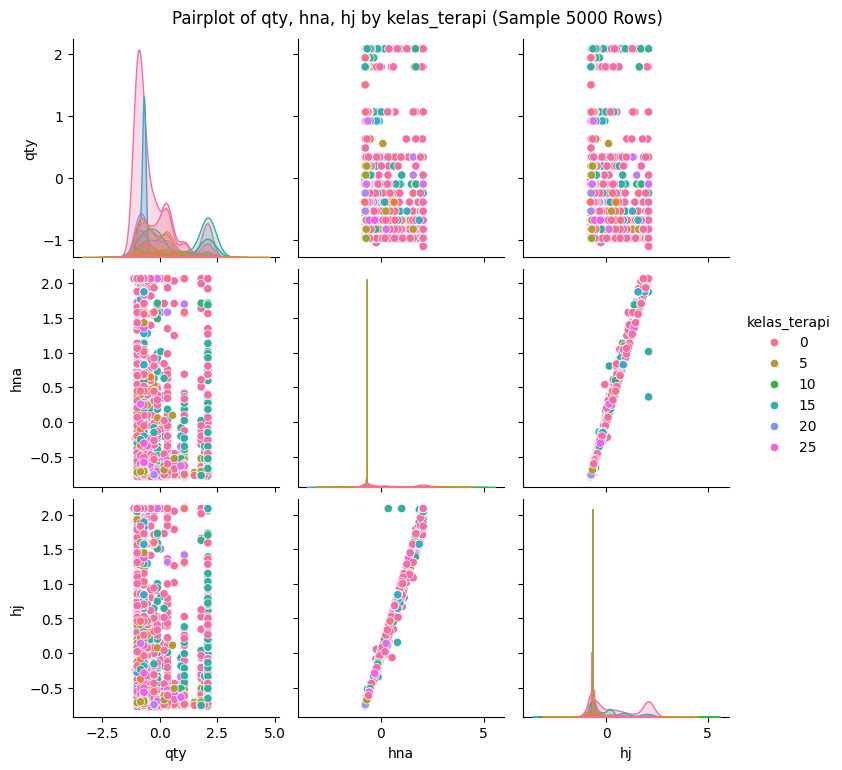

From the pairplot, it can be seen that there are differences in qty distribution and selling price between therapy classes.


In [14]:
# Pairplot of Important Features (Sampling 5000 Rows)
df_sample = df.sample(n=5000, random_state=42)
sns.pairplot(df_sample, vars=['qty', 'hna', 'hj'], hue='kelas_terapi', palette='husl')
plt.suptitle('Pairplot of qty, hna, hj by kelas_terapi (Sample 5000 Rows)', y=1.02)
plt.show()

# Analysis result
print("From the pairplot, it can be seen that there are differences in qty distribution and selling price between therapy classes.")